In [20]:
import scanpy as sc
import squidpy as sq
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

from squidpy.pl._utils import save_fig

sc.logging.print_header()
sc.set_figure_params(facecolor="white", figsize=(8, 8))
sc.settings.verbosity = 3
sc.settings.dpi = 300
sq.__version__
sc.settings.figdir = "./figures"

%load_ext autoreload
%autoreload 2
%load_ext lab_black

PATH_FIGURES = "/Users/giovanni.palla/Projects/squidpy_reproducibility/notebooks/graph_figures/figures"

scanpy==1.8.0.dev78+gc488909a anndata==0.7.5 umap==0.4.6 numpy==1.20.1 scipy==1.6.0 pandas==1.2.3 scikit-learn==0.24.2 statsmodels==0.12.2 python-igraph==0.8.3 leidenalg==0.8.3
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
The lab_black extension is already loaded. To reload it, use:
  %reload_ext lab_black


In [2]:
adata = sq.datasets.seqfish()
adata

AnnData object with n_obs × n_vars = 19416 × 351
    obs: 'Area', 'celltype_mapped_refined'
    uns: 'celltype_mapped_refined_colors'
    obsm: 'X_umap', 'spatial'

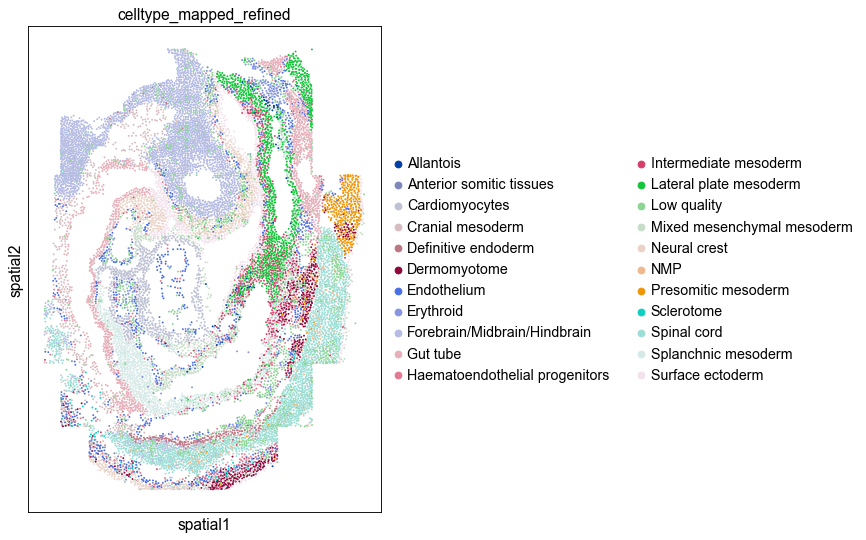

In [3]:
sc.pl.spatial(
    adata,
    color=["celltype_mapped_refined"],
    save="_seqfish.png",
    spot_size=0.03,
)

In [4]:
sq.gr.spatial_neighbors(adata, delaunay=True)
sq.gr.nhood_enrichment(adata, cluster_key="celltype_mapped_refined", n_perms=1000)

Creating graph using `generic` coordinates and `None` transform
Adding `adata.obsp['spatial_connectivities']`
       `adata.obsp['spatial_distances']`
       `adata.uns['spatial_neighbors']`
Finish (0:00:14)
Calculating neighborhood enrichment using `1` core(s)


  0%|          | 0/1000 [00:00<?, ?/s]

Adding `adata.uns['celltype_mapped_refined_nhood_enrichment']`
Finish (0:00:08)


In [5]:
arr = np.array(adata.uns["celltype_mapped_refined_nhood_enrichment"]["zscore"])

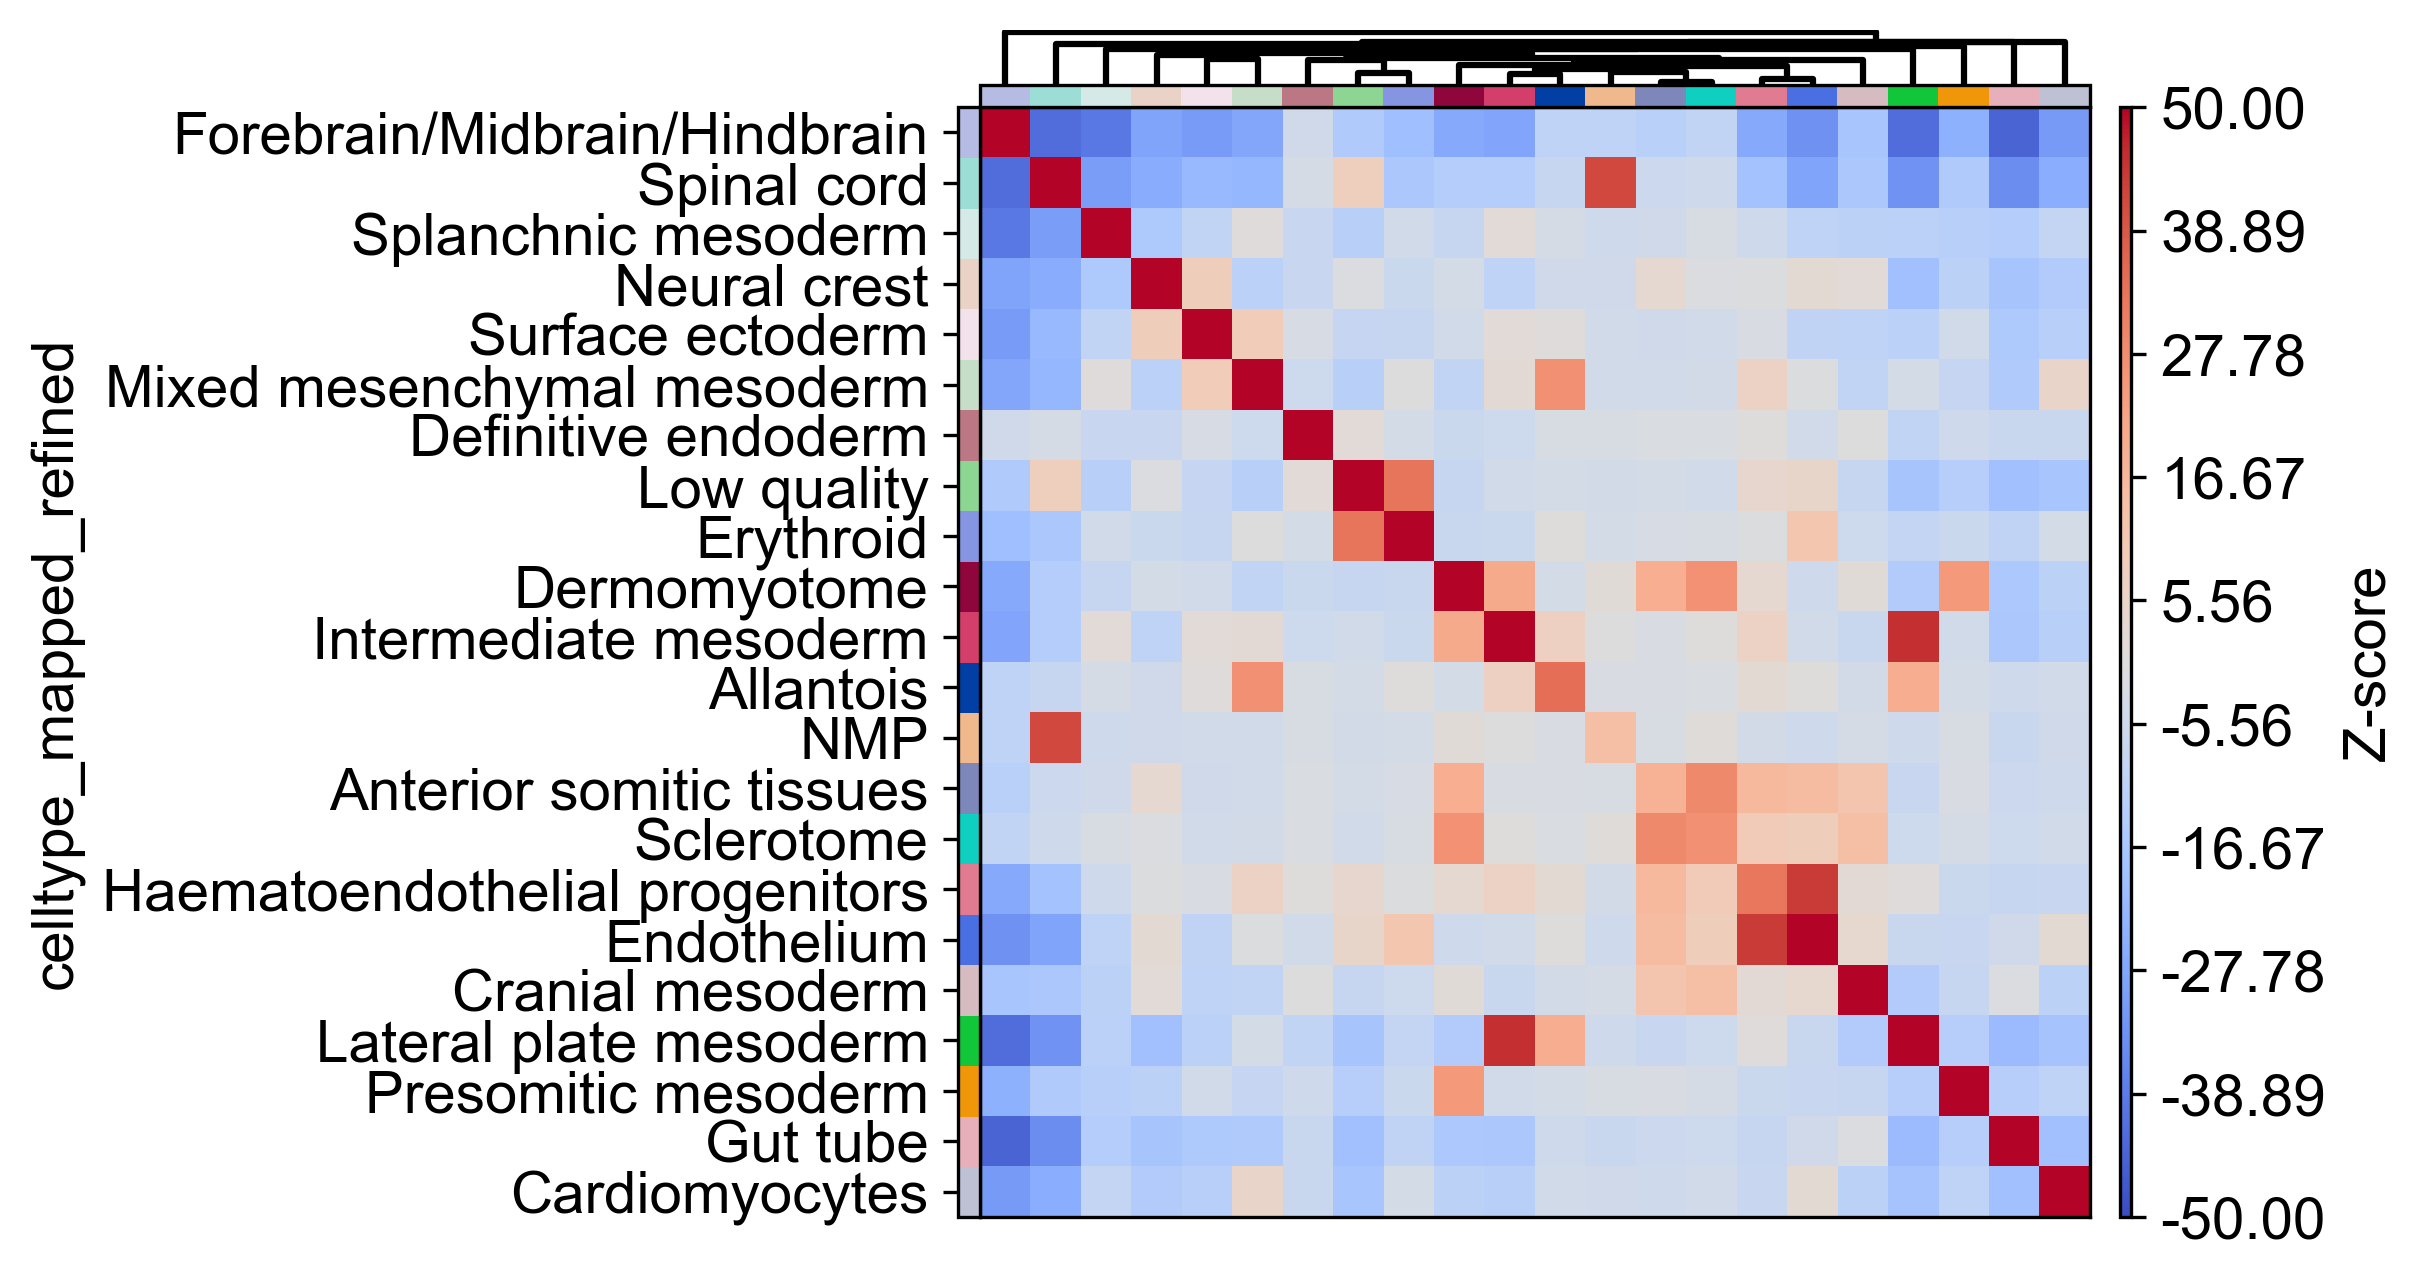

In [19]:
sq.pl.nhood_enrichment(
    adata,
    cluster_key="celltype_mapped_refined",
    cmap="coolwarm",
    title="",
    method="ward",
    dpi=300,
    figsize=(5, 4),
    save="nhod_seqfish.png",
    cbar_kwargs={"label": "Z-score"},
    vmin=-50,
    vmax=50,
)

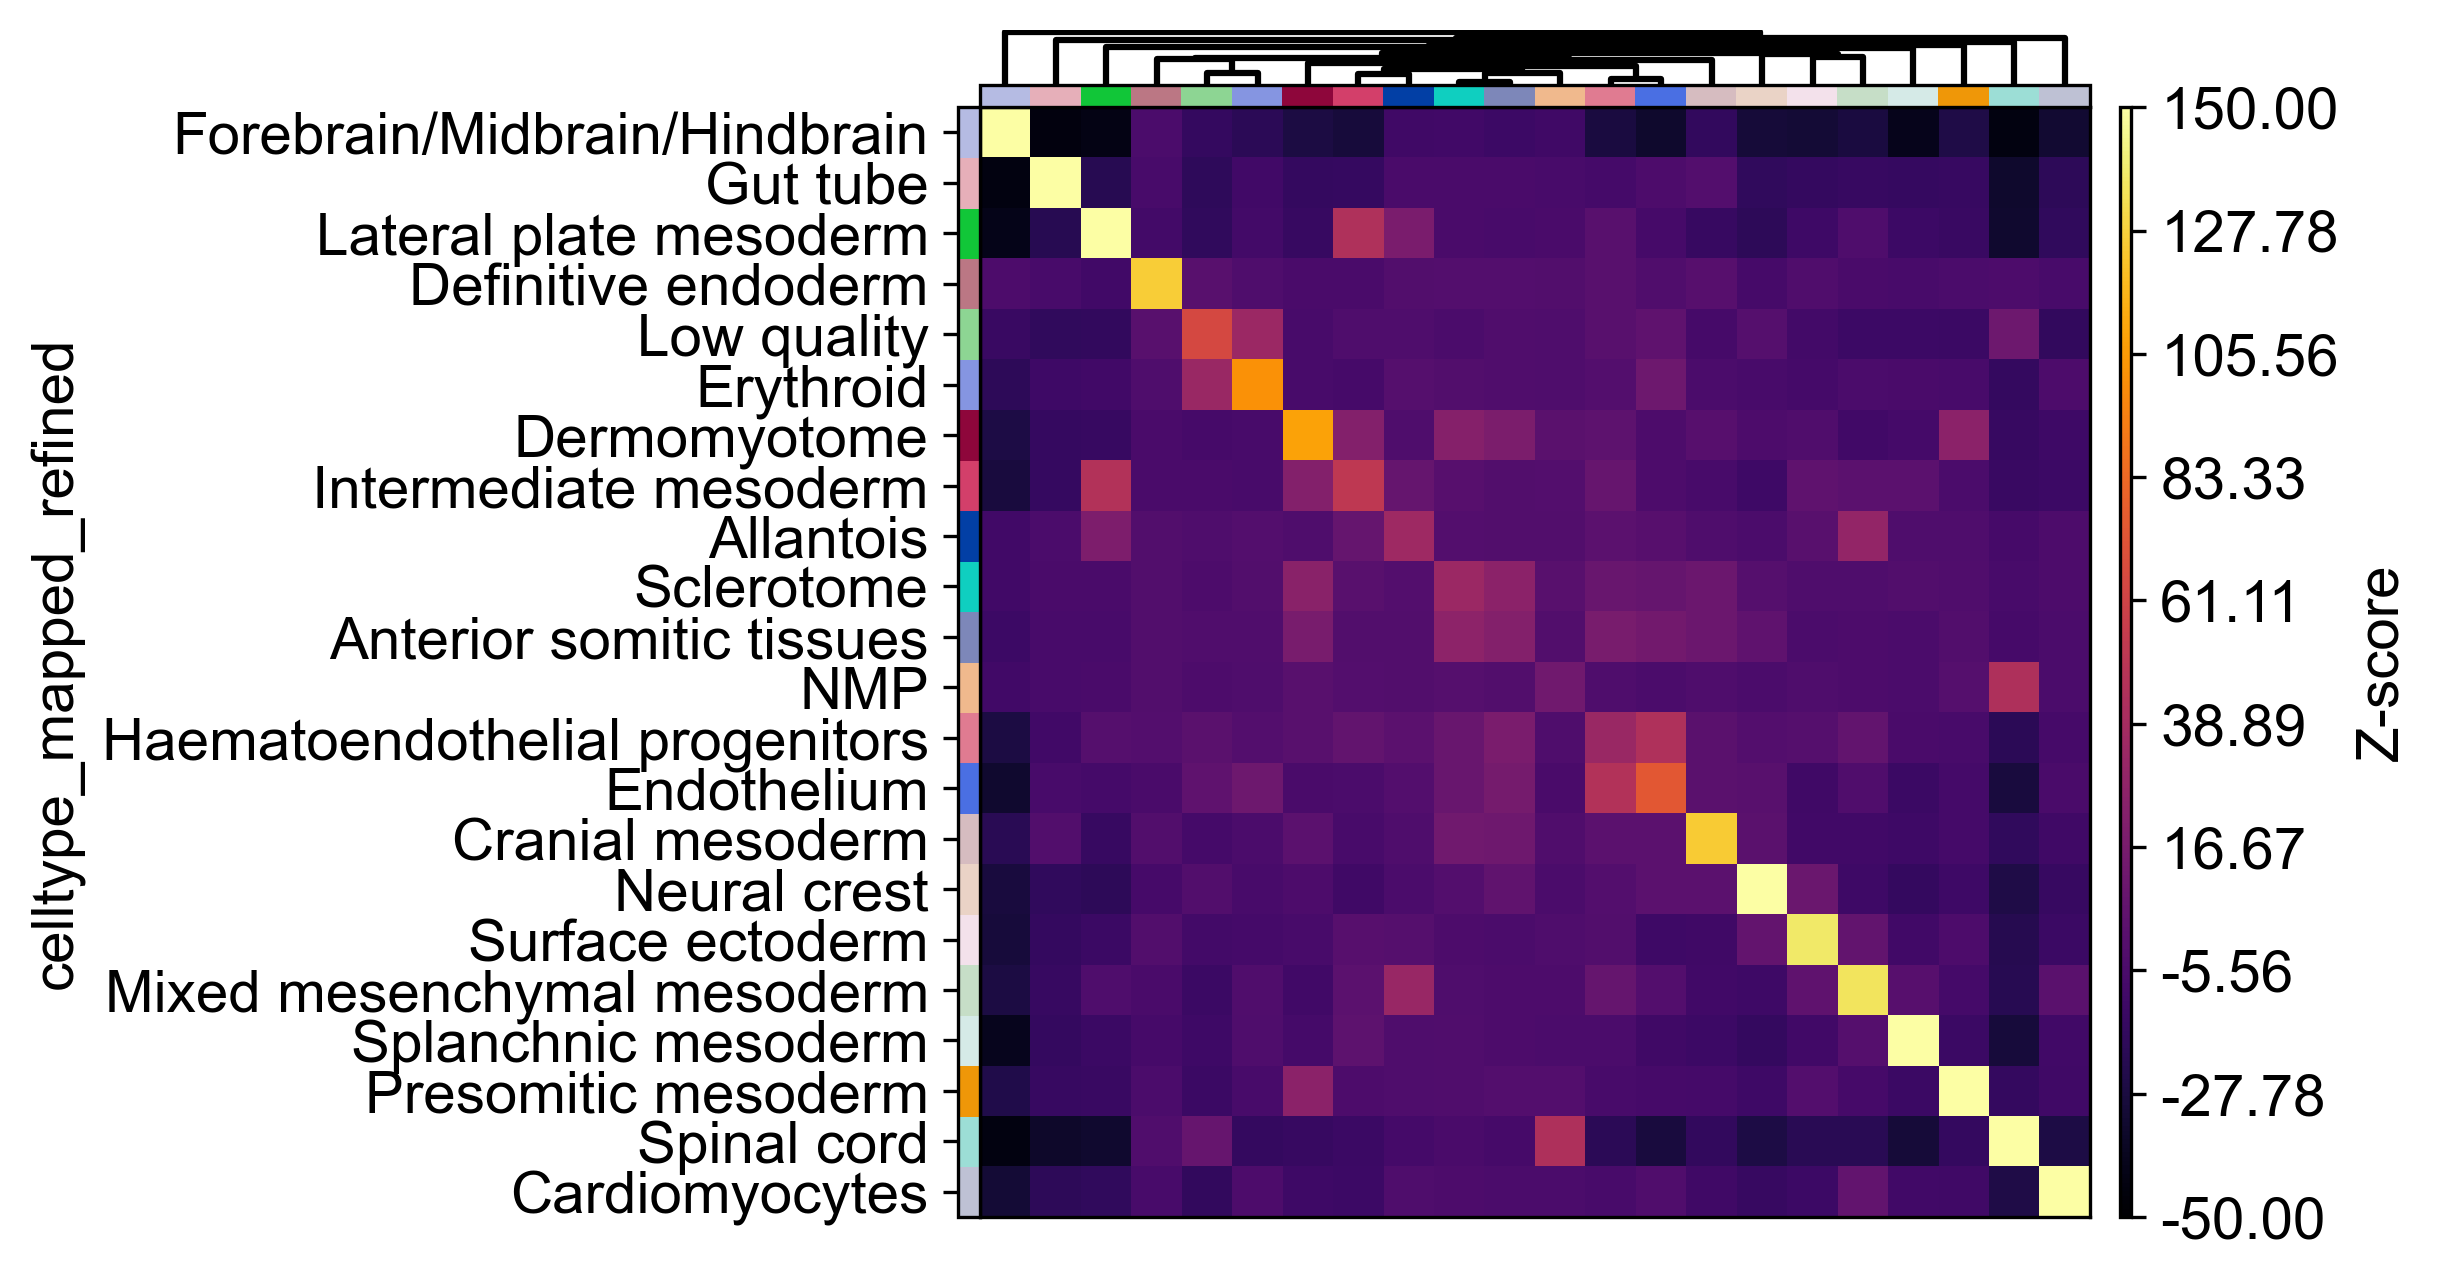

In [14]:
sq.pl.nhood_enrichment(
    adata,
    cluster_key="celltype_mapped_refined",
    cmap="inferno",
    title="",
    method="ward",
    dpi=300,
    figsize=(5, 4),
    save="nhod_seqfish.png",
    cbar_kwargs={"label": "Z-score"},
    vmin=-50,
    vmax=150,
)

In [11]:
fig, ax = plt.subplots(
    figsize=(3, 6),
)
sc.pl.spatial(
    adata,
    color=["celltype_mapped_refined"],
    groups=[
        "Endothelium",
        "Haematoendothelial progenitors",
        "Allantois",
        "Lateral plate mesoderm",
        "Intermediate mesoderm",
        "Presomitic mesoderm",
        "Dermomyotome",
    ],
    save="_endo_seqfish.png",
    frameon=False,
    ax=ax,
    show=False,
    spot_size=0.03,
)

[<AxesSubplot:title={'center':'celltype_mapped_refined'}, xlabel='spatial1', ylabel='spatial2'>]

In [100]:
fig, ax = plt.subplots(
    figsize=(3, 6),
)
sc.pl.spatial(
    adata,
    color=["celltype_mapped_refined"],
    groups=[
        "Allantois",
        "Lateral plate mesoderm",
        "Intermediate mesoderm",
        "Presomitic mesoderm",
    ],
    save="_meso_seqfish.png",
    spot_size=0.03,
    ax=ax,
    show=False,
    spot_size=0.03,
)

SyntaxError: keyword argument repeated (<ipython-input-100-7165ce7bc272>, line 17)

In [81]:
sq.gr.co_occurrence(
    adata,
    cluster_key="celltype_mapped_refined",
)

Calculating co-occurrence probabilities
Adding `adata.uns['celltype_mapped_refined_co_occurrence']`
Finish (0:00:43)


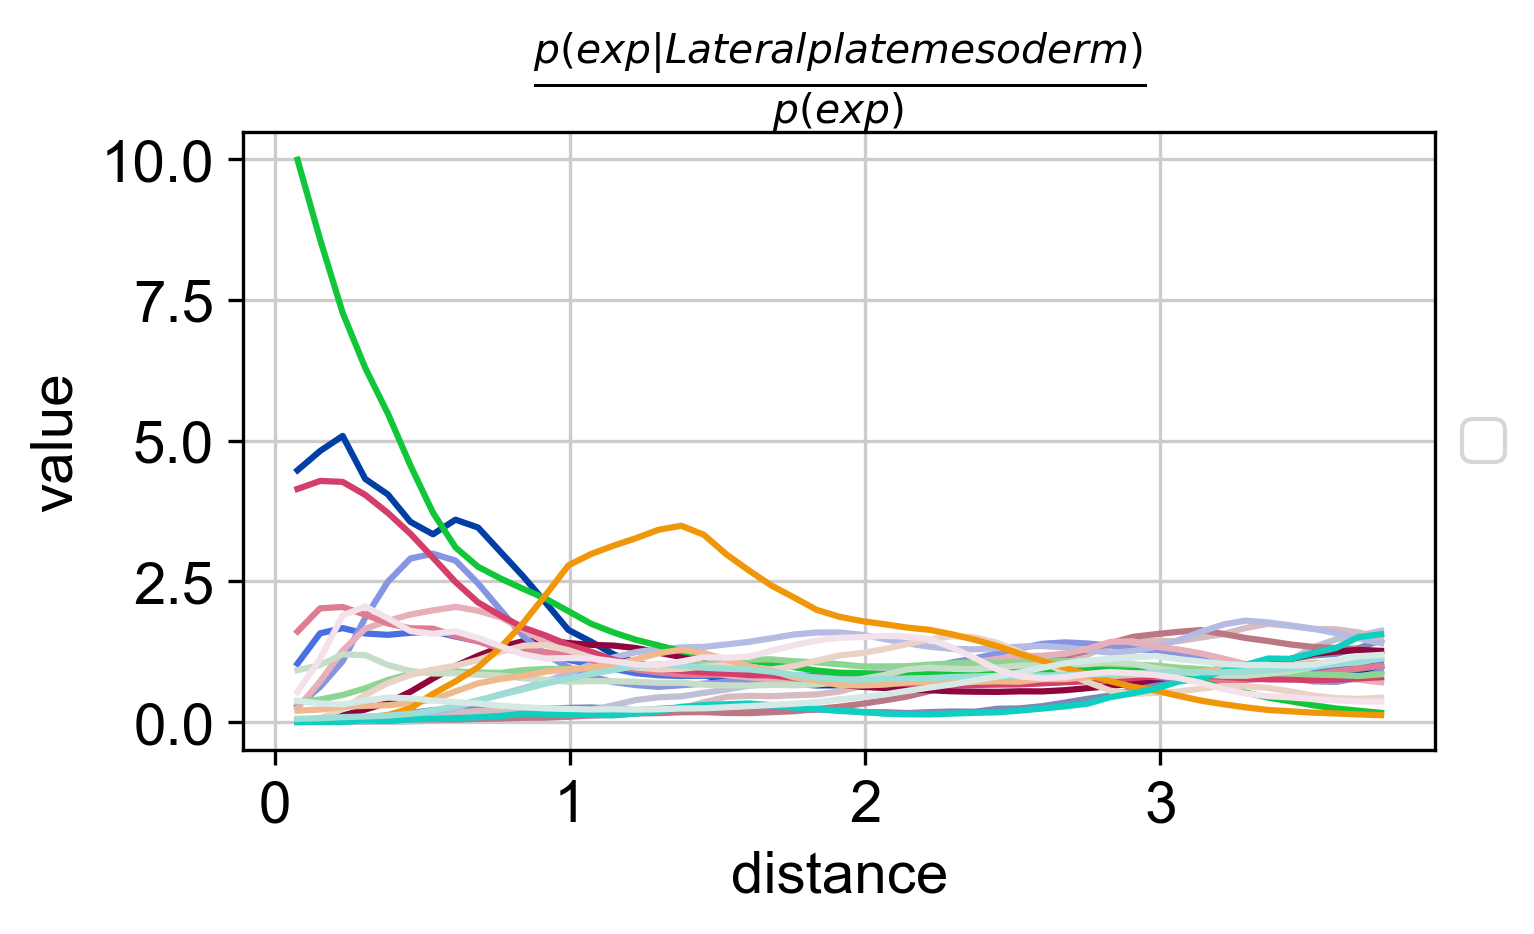

In [103]:
sq.pl.co_occurrence(
    adata,
    cluster_key="celltype_mapped_refined",
    clusters="Lateral plate mesoderm",
    figsize=(5, 3),
    legend=False,
    dpi=300,
    save="co_occurrence_seqfish",
)